In [1]:
source('load_nmeg.r')

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
# Load daily data files
seg <- daily_to_xts(get_daily_file('Seg', make_new=FALSE))
ses <- daily_to_xts(get_daily_file('Ses', make_new=FALSE))
wjs <- daily_to_xts(get_daily_file('Wjs', make_new=FALSE))
mpj <- daily_to_xts(get_daily_file('Mpj', make_new=FALSE))
vcp <- daily_to_xts(get_daily_file('Vcp', make_new=FALSE))
vcm <- daily_to_xts(get_daily_file('Vcm', make_new=FALSE))

In [3]:
# Load packages for calculating SPEI
# This package is on CRAN (https://cran.r-project.org/web/packages/SPEI/index.html)
# Website for the project is http://sac.csic.es/spei/index.html
#install.packages('SPEI')
library('SPEI')

Loading required package: lmomco
Loading required package: parallel
# Package SPEI (1.6) loaded [try SPEINews()].


In [4]:
get_spei <- function(df_t, n_periods, time_base='monthly', title='SPEI site', plot=TRUE){
    # Calculate climatic water deficit on weekly or monthly timestep
    # (Precipitation - potential ET)
    if (time_base=='weekly'){
    site_cwdiff <- (apply.weekly(df_t$P_F, FUN=sum) - 
                           apply.weekly(df_t$PET_F_mm_daytime, FUN=sum))
        }
    else if (time_base=='monthly'){
    site_cwdiff <- (apply.monthly(df_t$P_F, FUN=sum) - 
                           apply.monthly(df_t$PET_F_mm_daytime, FUN=sum))
        }
    colnames(site_cwdiff) <- title
    
    # Not sure if this works - similar to the "SPEI" value Dan once calculated...
    #site_cwdiff$cwdiff_scaled <- (site_cwdiff$cwdiff / 
    #                              apply.weekly(df_t$PET_F_mm_daytime, FUN=sum))
    
    # Now get the SPEI values using the SPEI package
    # This is set to spit out the plots
    site_spei <- spei(site_cwdiff, n_periods, na.rm=TRUE)
    if (plot==TRUE){
        plot(site_spei)
    }
    # pull out SPEI as a vector
    site_cwdiff$spei <- as.vector(site_spei$fitted)
    return(site_cwdiff)
}

## Calculate SPEI using a monthly timestep

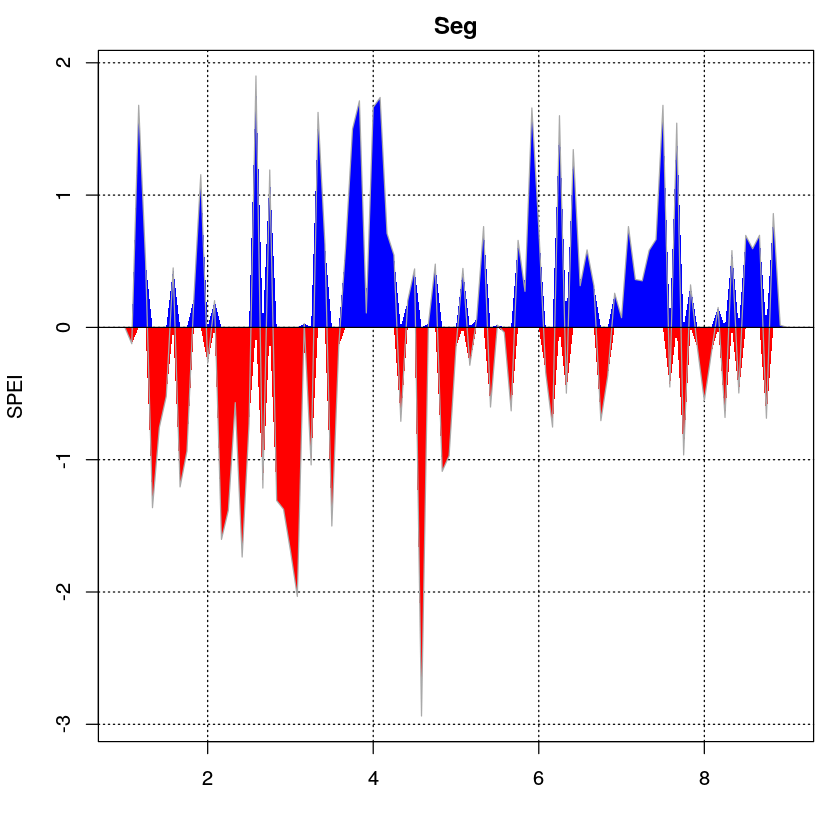

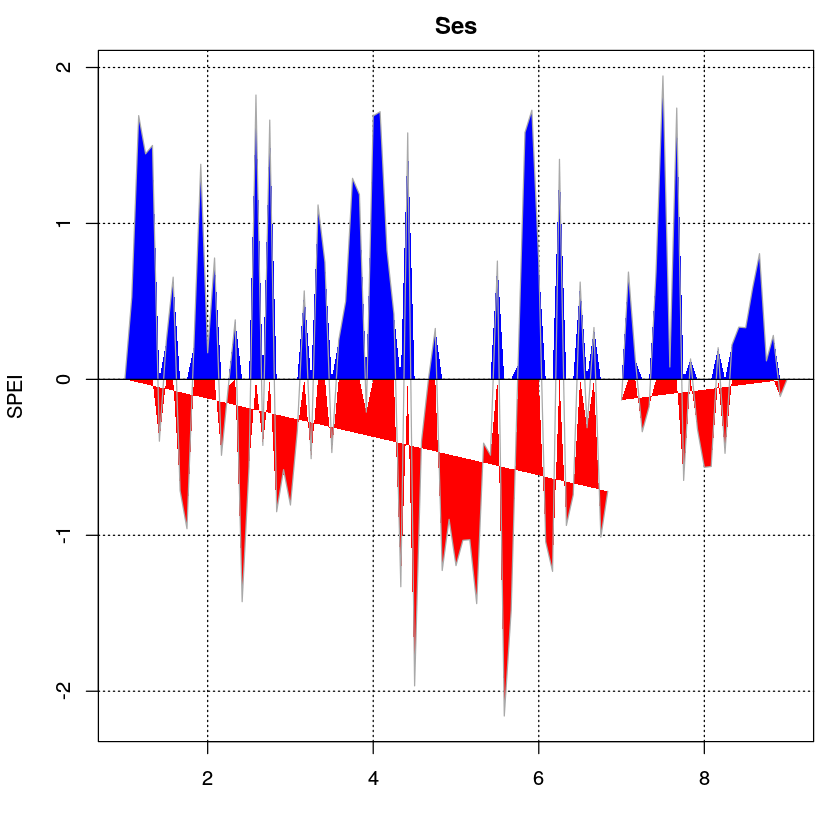

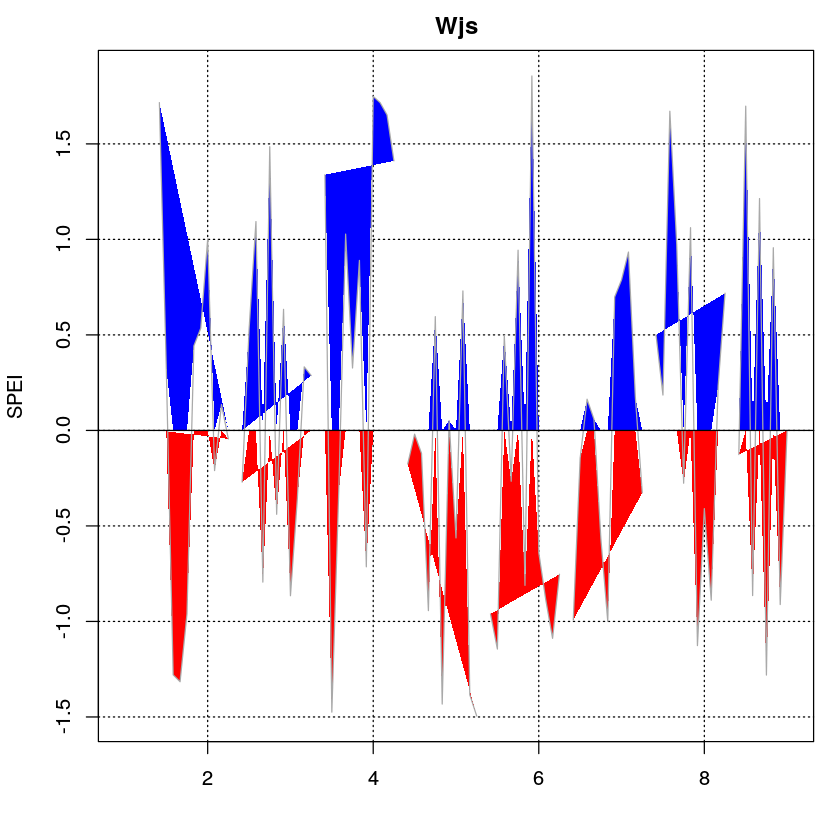

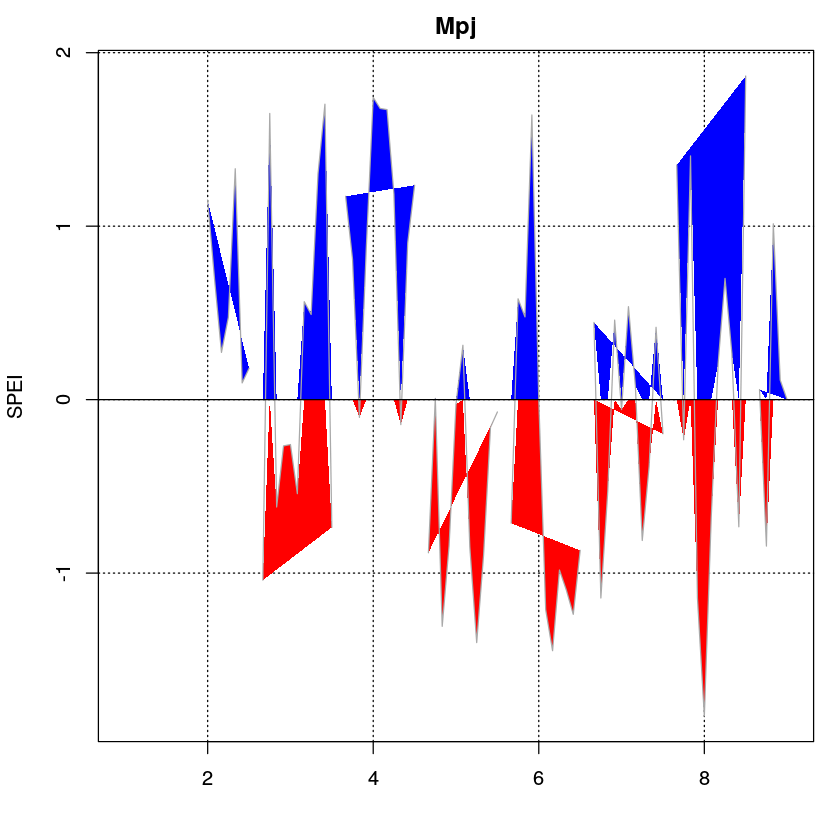

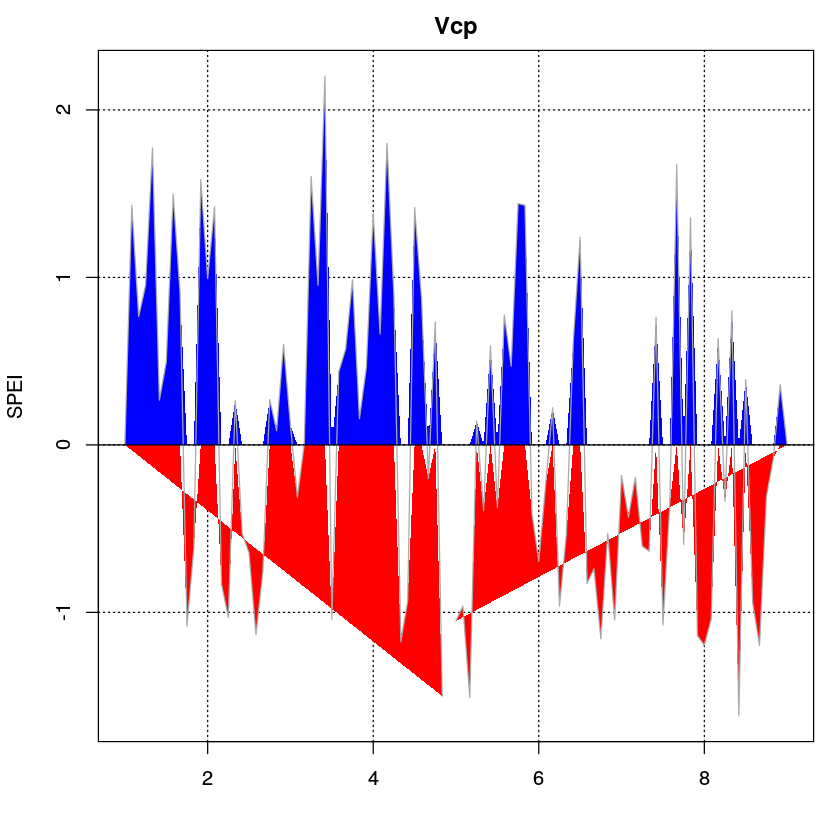

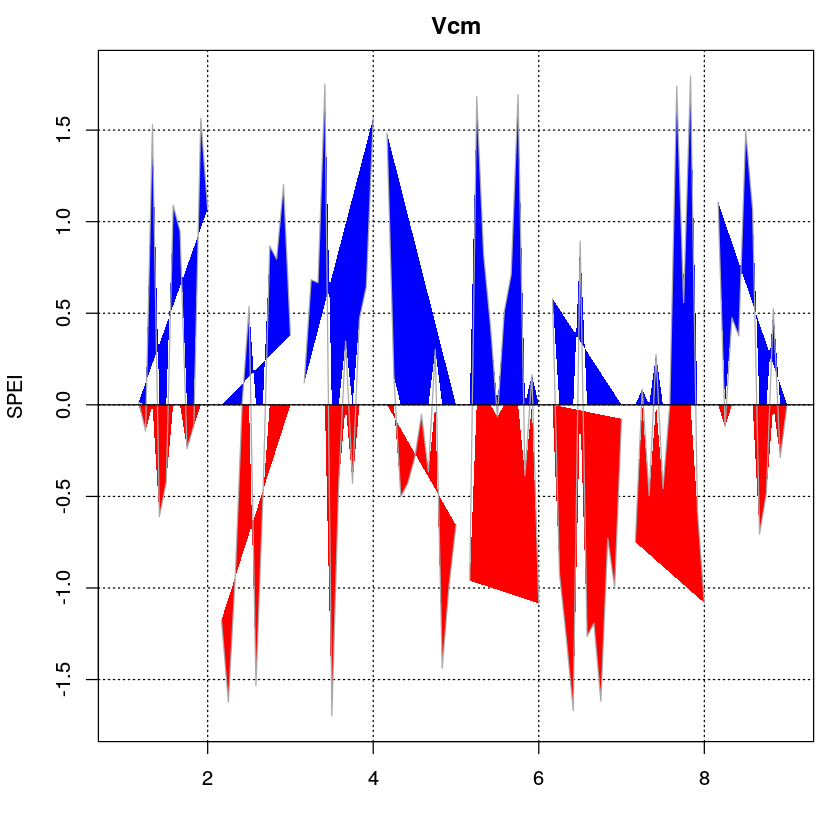

In [5]:
# 1 month SPEI
n_t_units = 1
spei_m_3 <- get_spei(seg, n_t_units, title='Seg')[,2]
colnames(spei_m_3) <- 'Seg'
spei_m_3$Ses <- get_spei(ses, n_t_units, title='Ses')[,2]
spei_m_3$Wjs <- get_spei(wjs, n_t_units, title='Wjs')[,2]
spei_m_3$Mpj <- get_spei(mpj, n_t_units, title='Mpj')[,2]
spei_m_3$Vcp <- get_spei(vcp, n_t_units, title='Vcp')[,2]
spei_m_3$Vcm <- get_spei(vcm, n_t_units, title='Vcm')[,2]

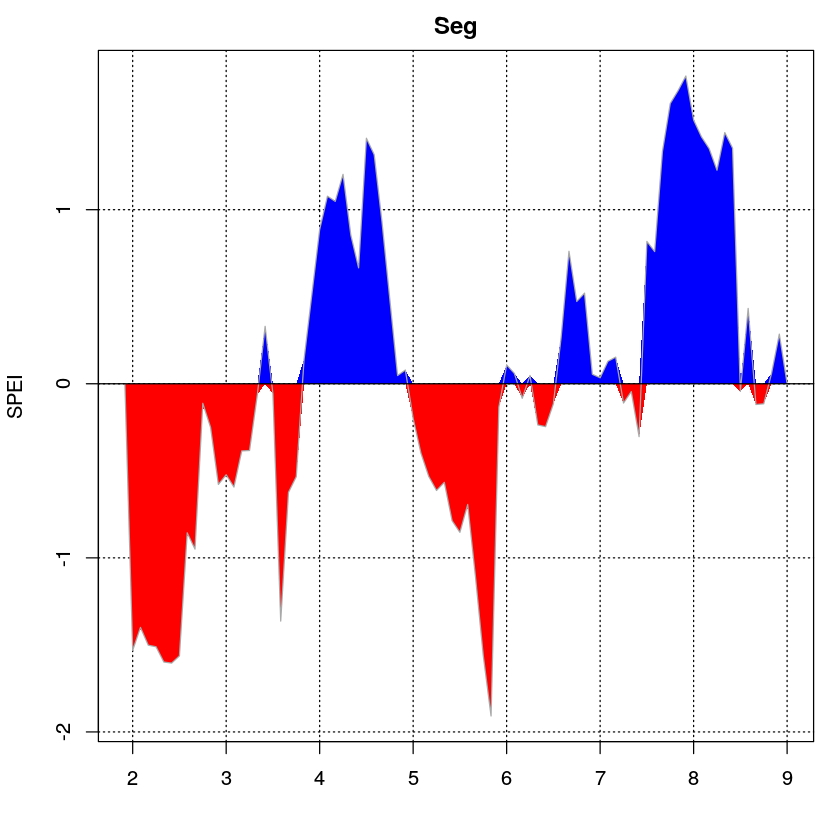

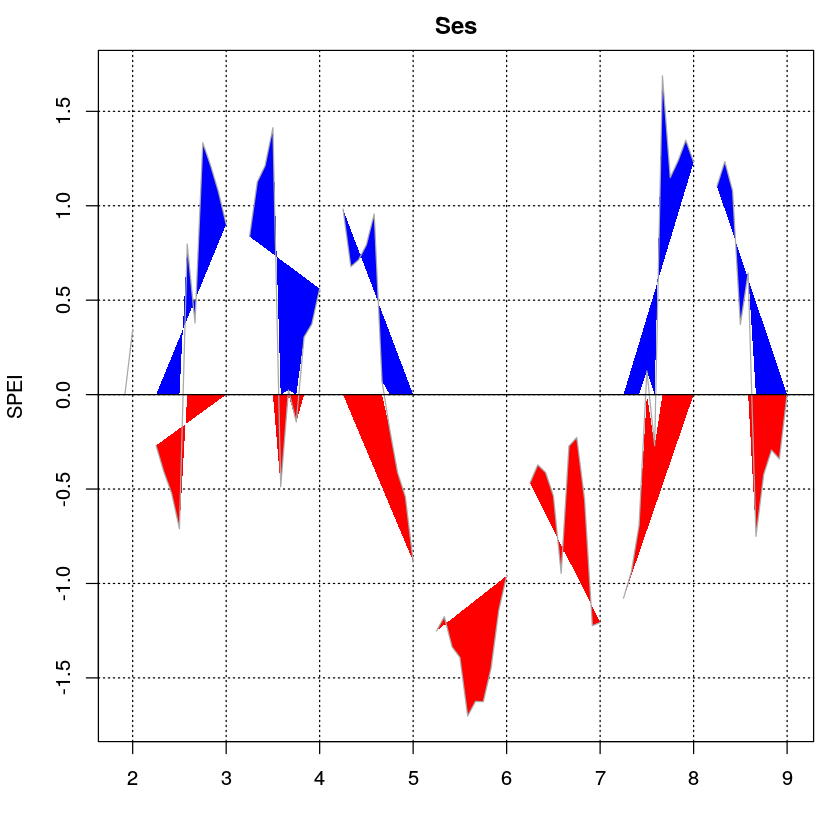

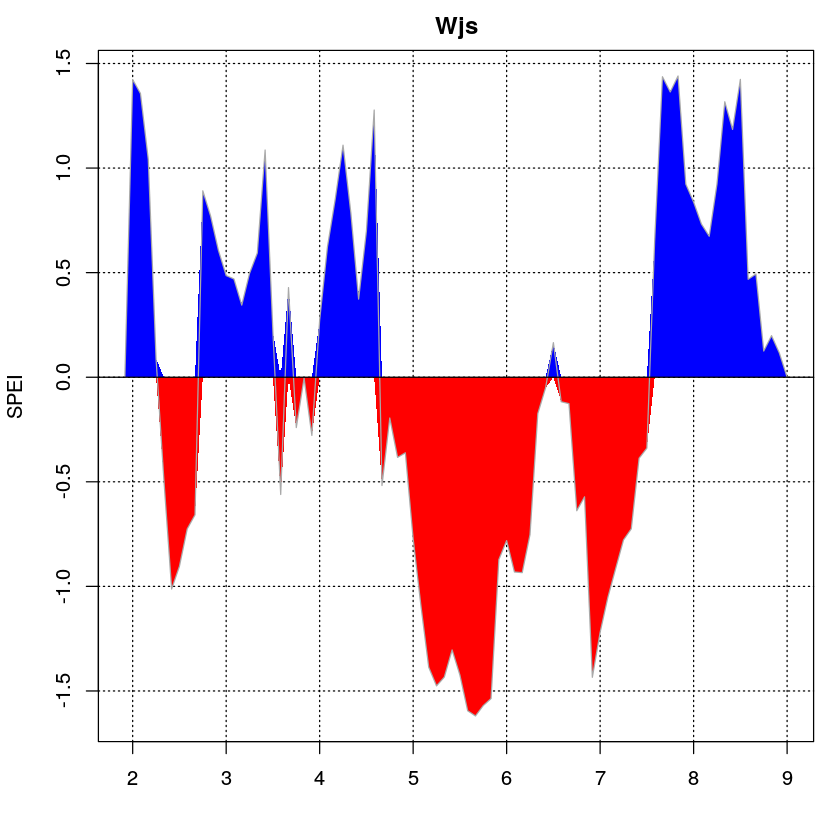

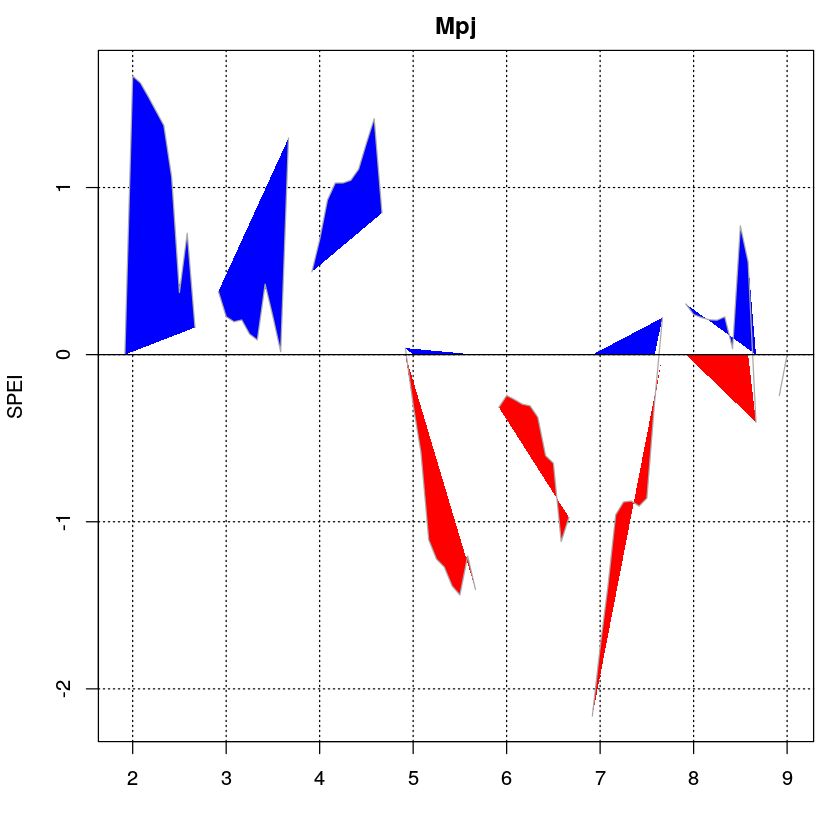

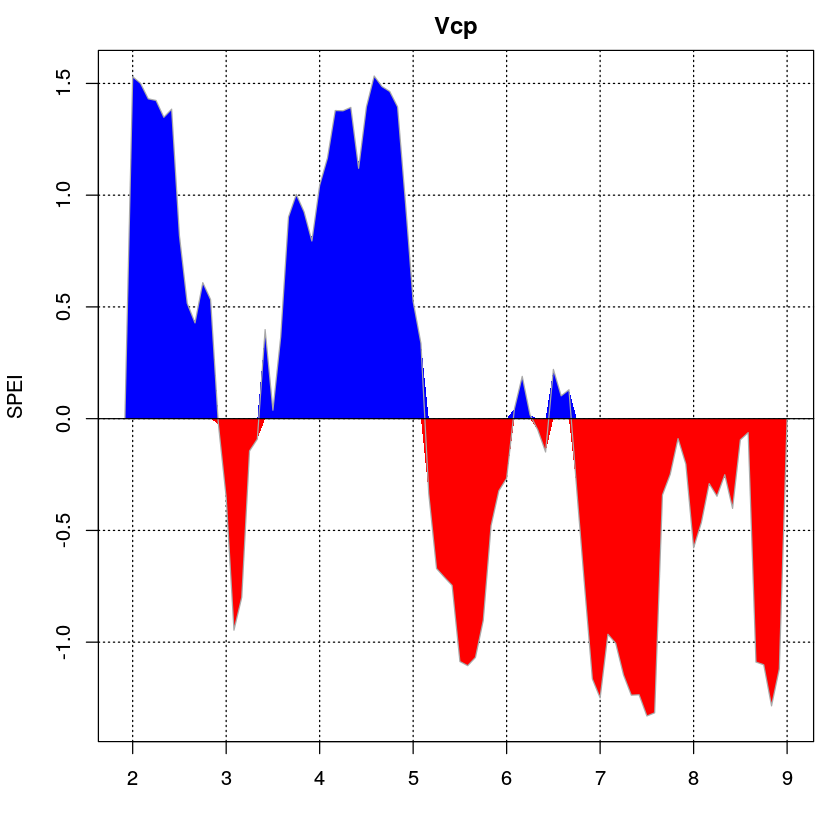

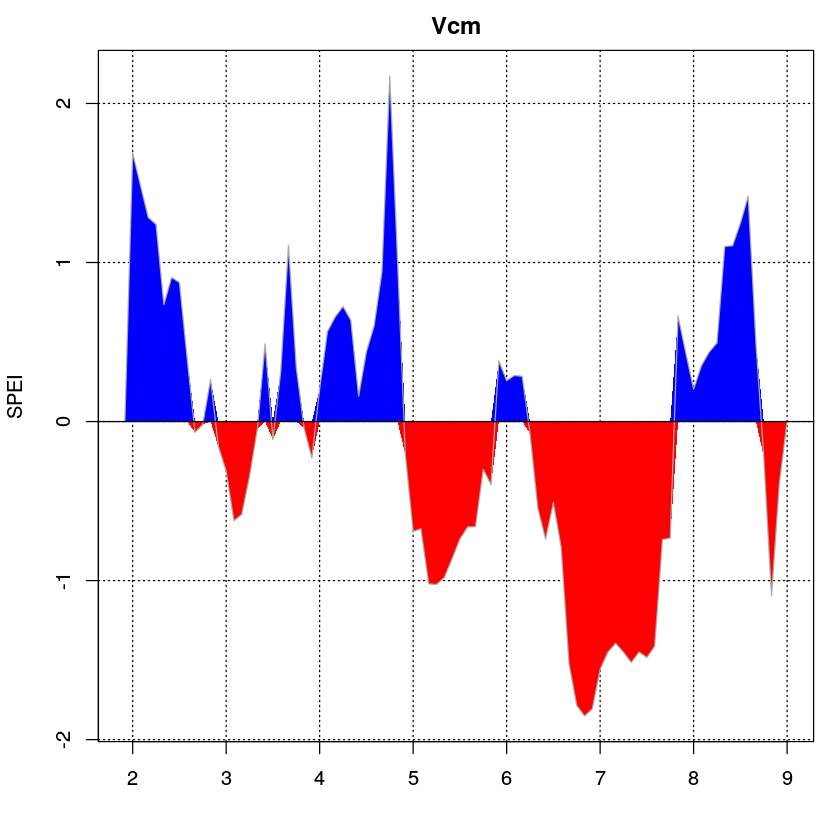

In [7]:
# 12 month SPEI
n_t_units = 12
spei_m_12 <- get_spei(seg, n_t_units, title='Seg')[,2]
colnames(spei_m_12) <- 'Seg'
spei_m_12$Ses <- get_spei(ses, n_t_units, title='Ses')[,2]
spei_m_12$Wjs <- get_spei(wjs, n_t_units, title='Wjs')[,2]
spei_m_12$Mpj <- get_spei(mpj, n_t_units, title='Mpj')[,2]
spei_m_12$Vcp <- get_spei(vcp, n_t_units, title='Vcp')[,2]
spei_m_12$Vcm <- get_spei(vcm, n_t_units, title='Vcm')[,2]

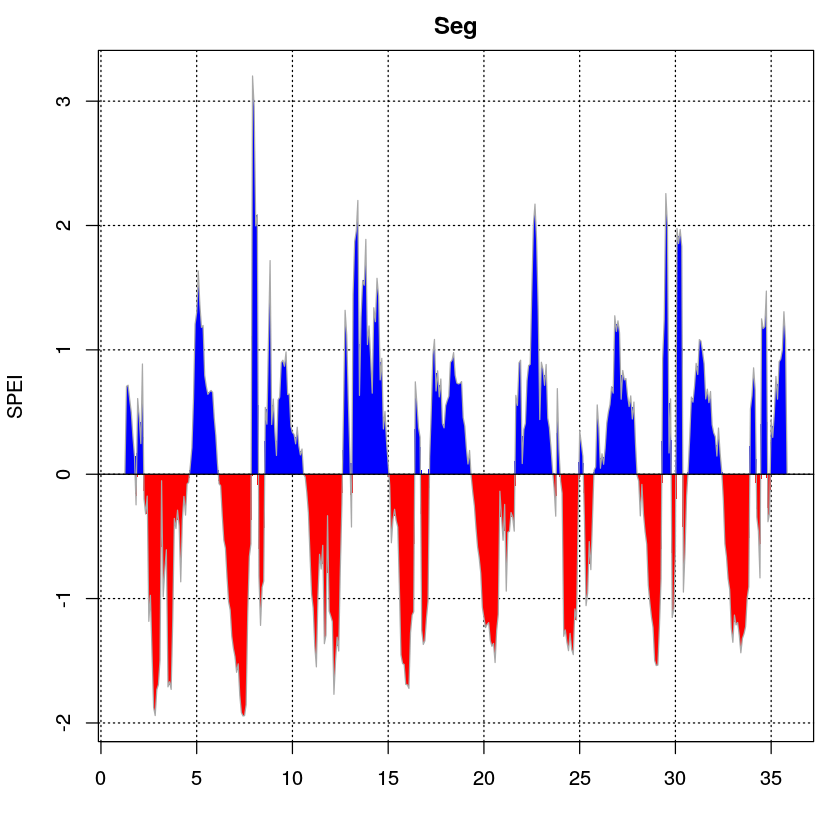

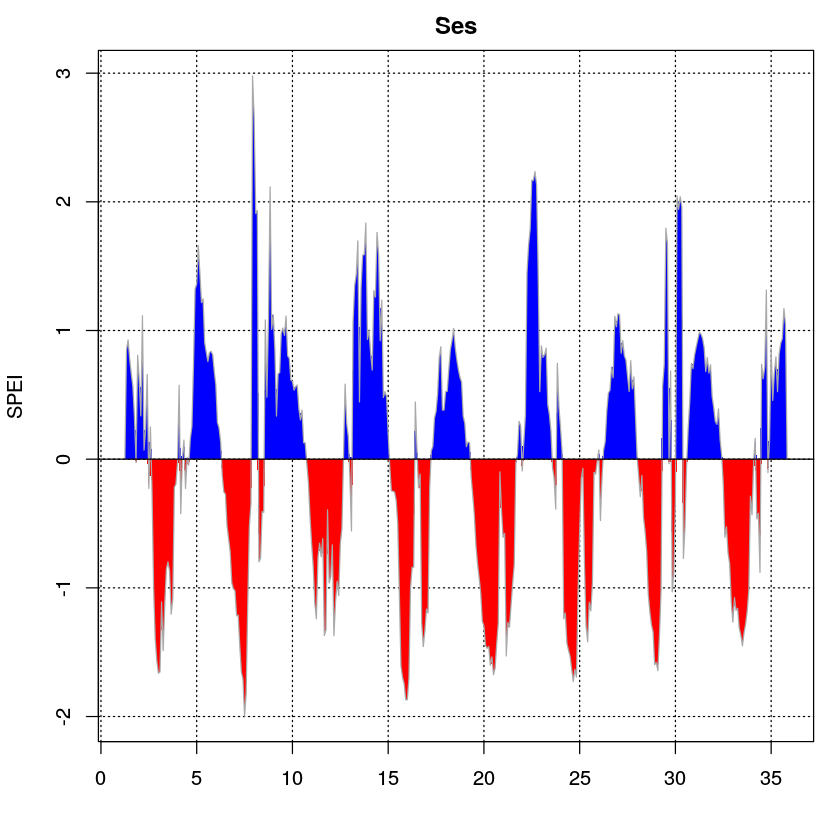

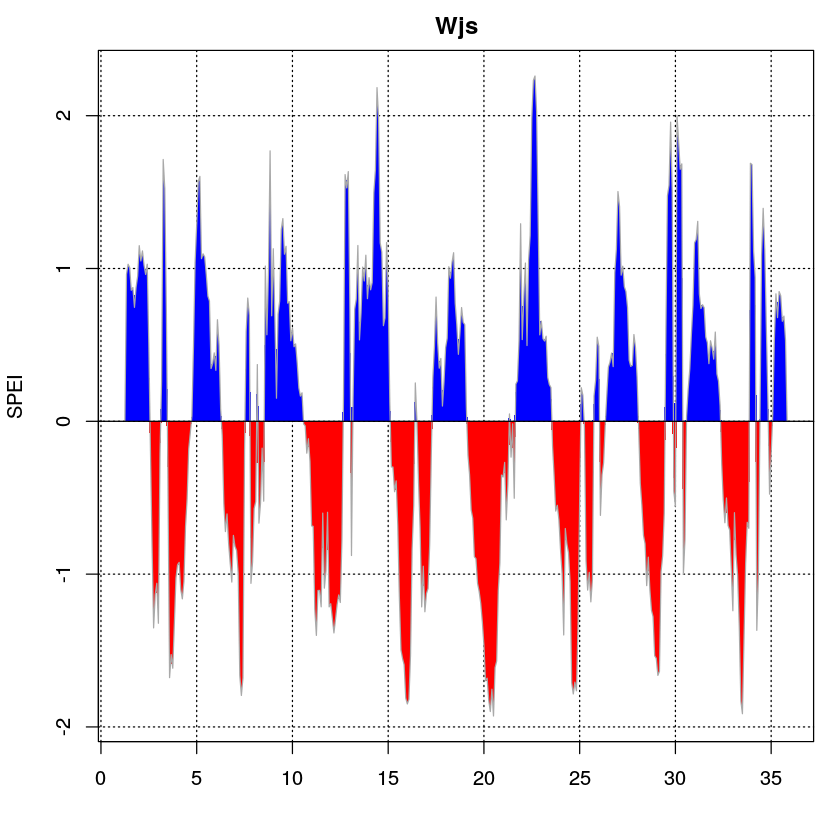

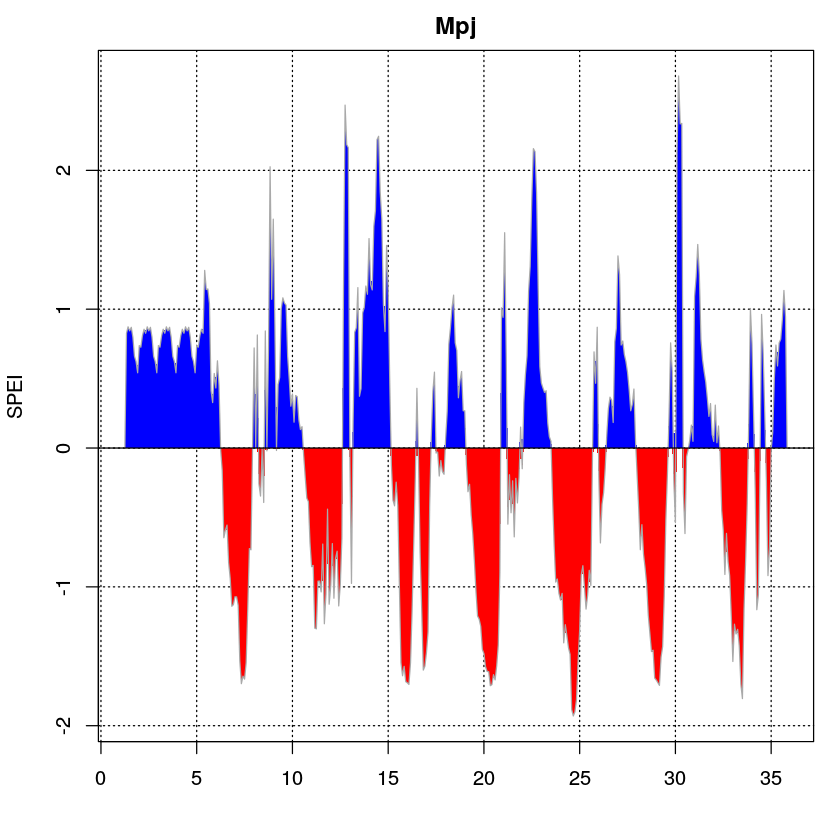

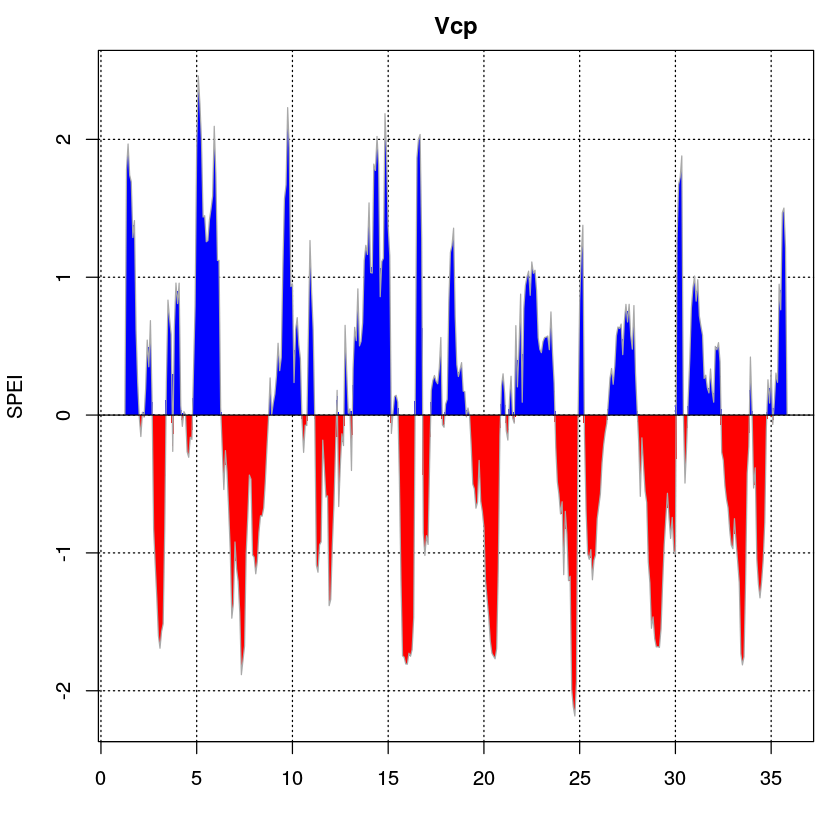

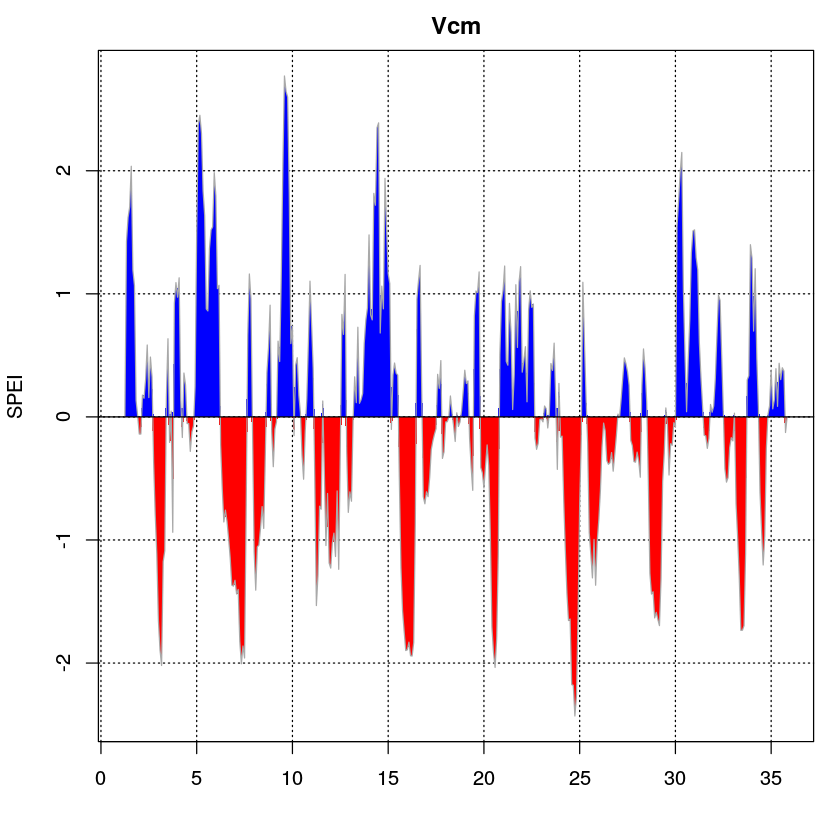

In [11]:
# 1 month SPEI (4 weeks, calculated on weekly basis)
n_t_units = 4
spei_w_4 <- get_spei(seg, n_t_units, time_base='weekly', title='Seg')[,2]
colnames(spei_w_4) <- 'Seg'
spei_w_4$Ses <- get_spei(ses, n_t_units, time_base='weekly', title='Ses')[,2]
spei_w_4$Wjs <- get_spei(wjs, n_t_units, time_base='weekly', title='Wjs')[,2]
spei_w_4$Mpj <- get_spei(mpj, n_t_units, time_base='weekly', title='Mpj')[,2]
spei_w_4$Vcp <- get_spei(vcp, n_t_units, time_base='weekly', title='Vcp')[,2]
spei_w_4$Vcm <- get_spei(vcm, n_t_units, time_base='weekly', title='Vcm')[,2]

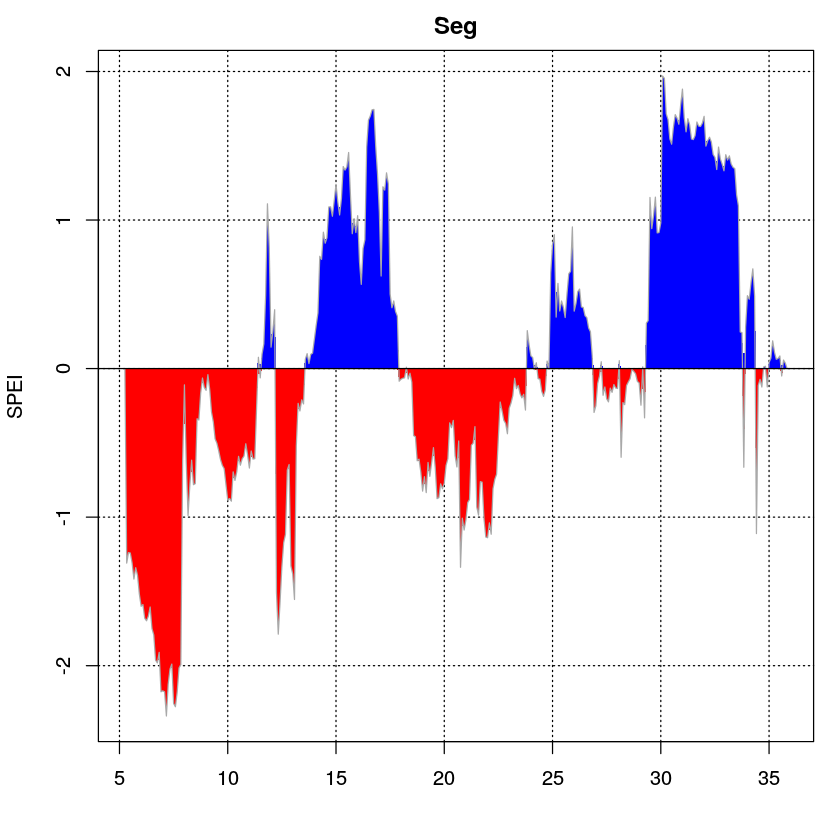

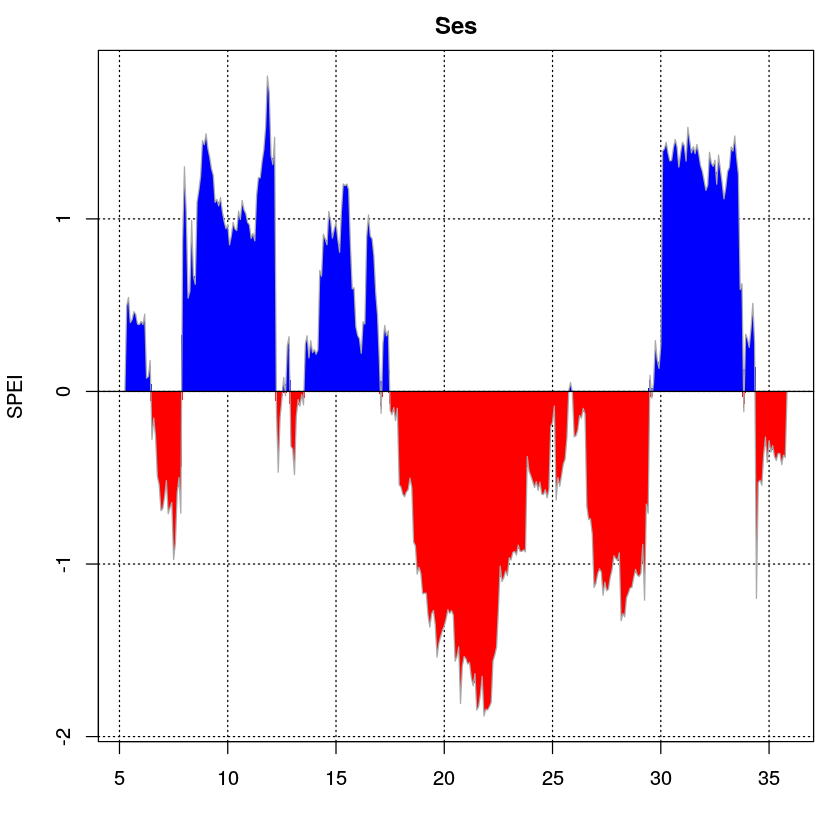

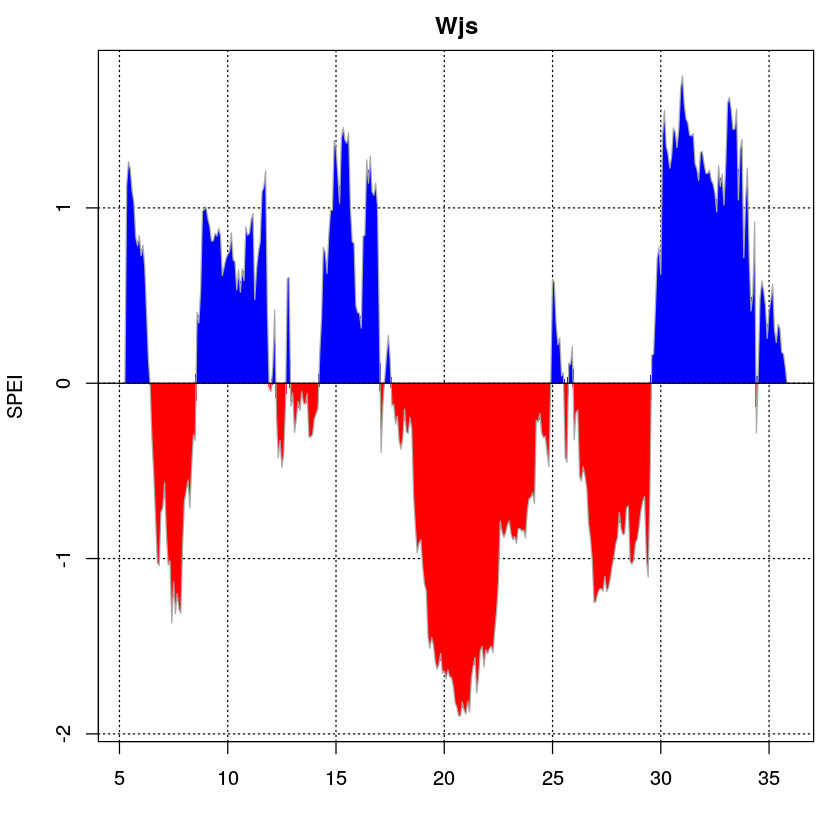

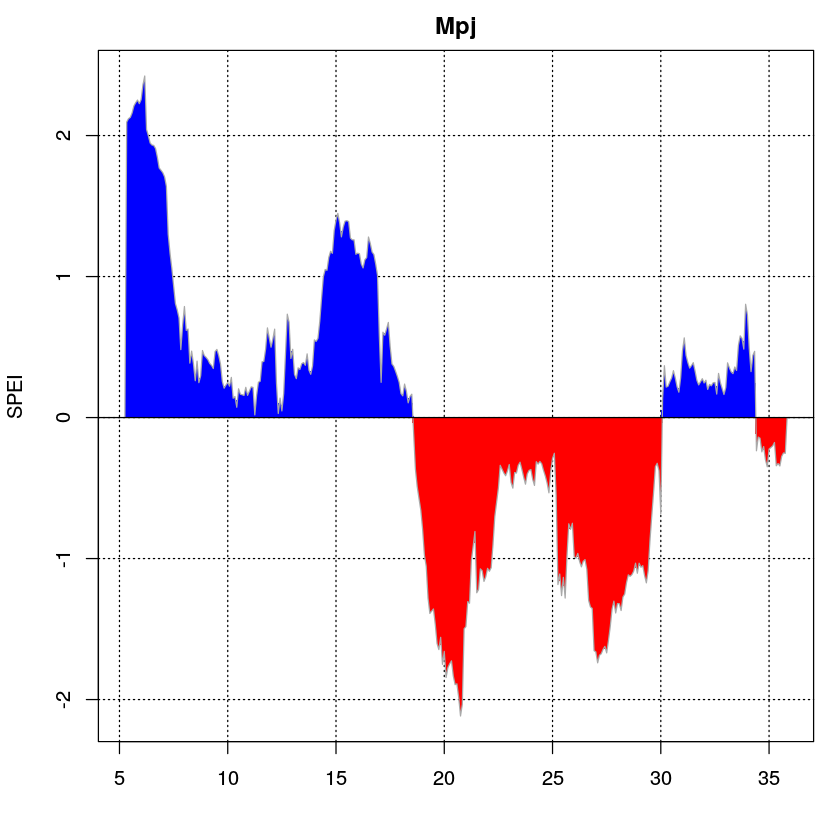

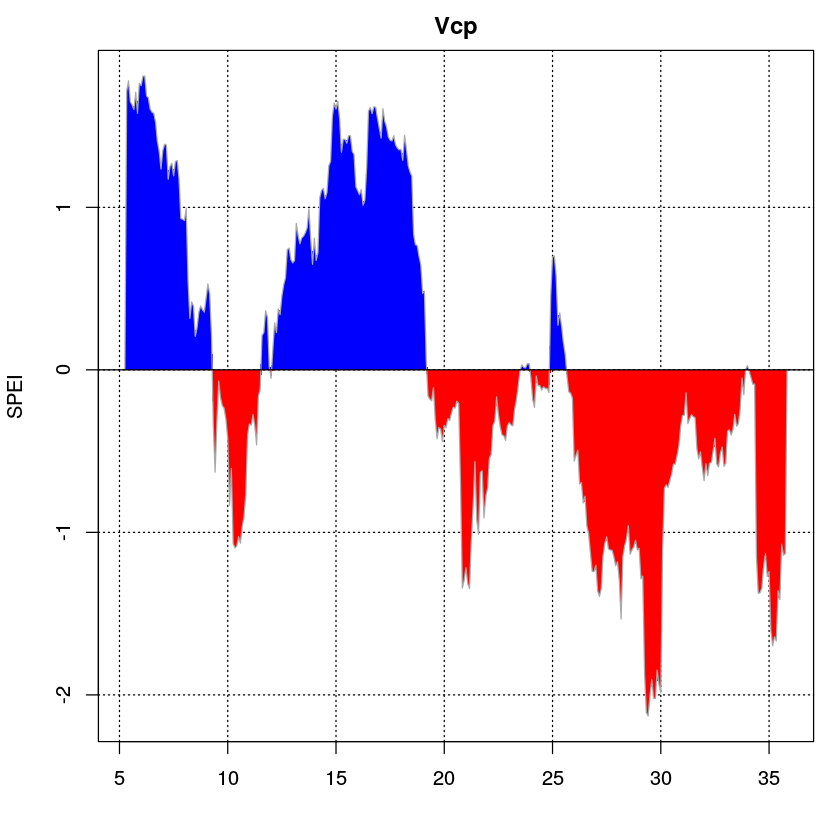

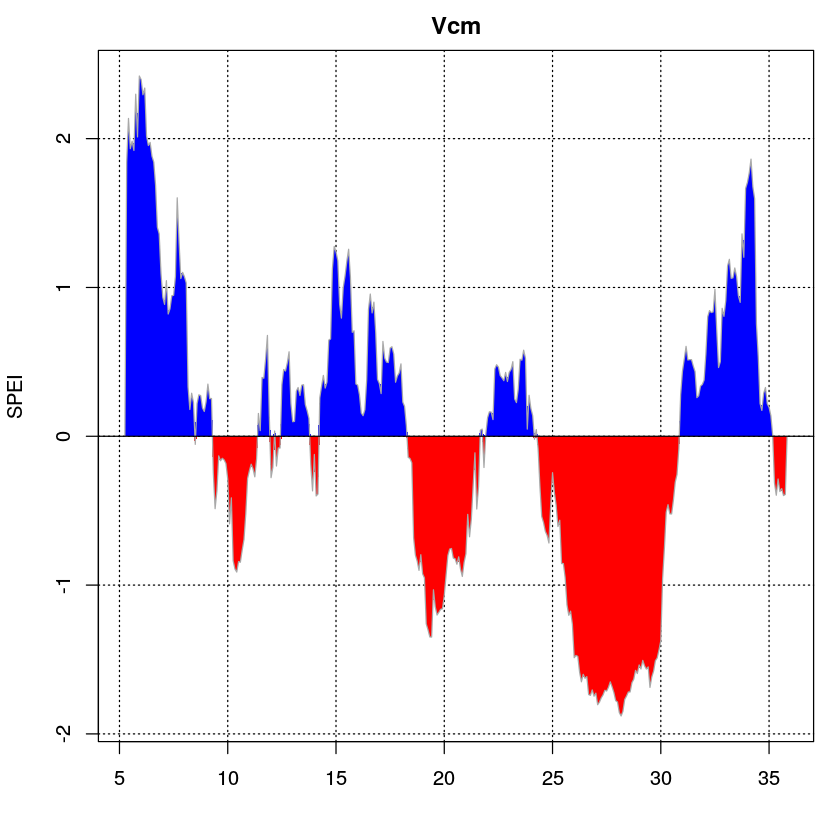

In [12]:
# 12 month SPEI (52 weeks - weekly timestep)
n_t_units = 52
spei_w_52 <- get_spei(seg, n_t_units, time_base='weekly', title='Seg')[,2]
colnames(spei_w_52) <- 'Seg'
spei_w_52$Ses <- get_spei(ses, n_t_units, time_base='weekly', title='Ses')[,2]
spei_w_52$Wjs <- get_spei(wjs, n_t_units, time_base='weekly', title='Wjs')[,2]
spei_w_52$Mpj <- get_spei(mpj, n_t_units, time_base='weekly', title='Mpj')[,2]
spei_w_52$Vcp <- get_spei(vcp, n_t_units, time_base='weekly', title='Vcp')[,2]
spei_w_52$Vcm <- get_spei(vcm, n_t_units, time_base='weekly', title='Vcm')[,2]

In [13]:
tail(spei_m_12)

                   Seg        Ses       Wjs        Mpj         Vcp        Vcm
2014-07-31 -0.04376600  0.3710659 1.4240155  0.7708115 -0.09461528  1.2455142
2014-08-31  0.43304406  0.6441211 0.4682909  0.5537701 -0.06257333  1.4162091
2014-09-30 -0.11914415 -0.7506122 0.4935158 -0.4043763 -1.08902942  0.4918433
2014-10-31 -0.11488736 -0.4224551 0.1252831         NA -1.10136218 -0.2175605
2014-11-30  0.05923866 -0.2939015 0.1988054         NA -1.28514811 -1.0950405
2014-12-31  0.28529100 -0.3404360 0.1161339 -0.2447323 -1.11977954 -0.3906474

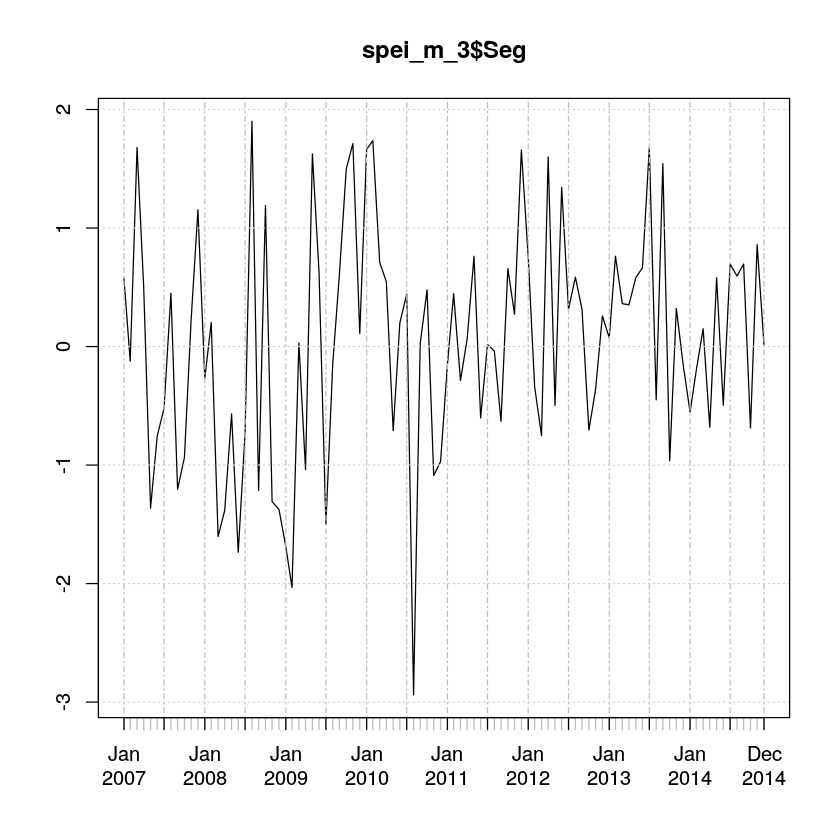

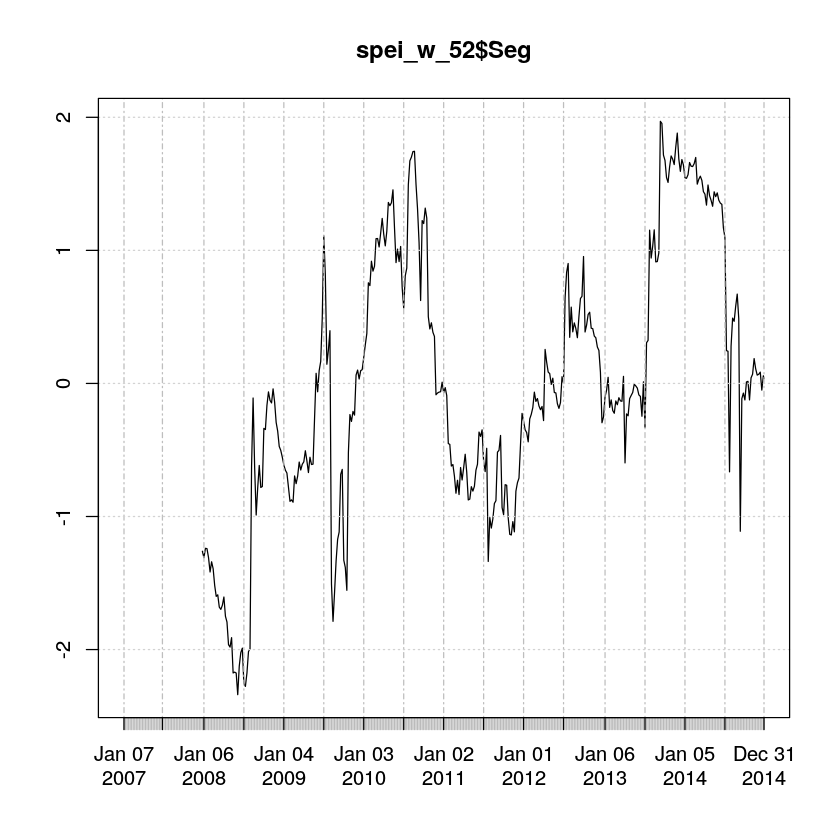

In [14]:
plot(spei_m_3$Seg)
plot(spei_w_52$Seg)
#write.zoo(spei_m_3, file='../../NMEG_utils/processed_data/SPEI_m_3mo_allsites.csv', sep=",")
#write.zoo(spei_w_52, file='../../NMEG_utils/processed_data/SPEI_w_12mo_allsites.csv', sep=",")

In [15]:
# Create a dataframe of 1 month SPEI for each site

spei_seg <- get_spei(seg, 1, title='Seg', plot=FALSE)[,2]
colnames(spei_seg) <- 'spei1mon'
spei_ses <- get_spei(ses, 1, title='Ses', plot=FALSE)[,2]
colnames(spei_ses) <- 'spei1mon'
spei_wjs <- get_spei(wjs, 1, title='Wjs', plot=FALSE)[,2]
colnames(spei_wjs) <- 'spei1mon'
spei_mpj <- get_spei(mpj, 1, title='Mpj', plot=FALSE)[,2]
colnames(spei_mpj) <- 'spei1mon'
spei_vcp <- get_spei(vcp, 1, title='Vcp', plot=FALSE)[,2]
colnames(spei_vcp) <- 'spei1mon'
spei_vcm <- get_spei(vcm, 1, title='Vcm', plot=FALSE)[,2]
colnames(spei_vcm) <- 'spei1mon'


In [16]:
# Now add 2:24 month SPEI calculations to this dataframe
for (i in 2:24) {
    # There is some funky issue with dynamically assigning column names to xts objects
    # The hack is to rename the col after adding
    label <- paste( 'spei', as.character(i), 'mon', sep='')
    spei_seg$tmp <- get_spei(seg, i, plot=FALSE)[,2]
    names(spei_seg)[names(spei_seg) == 'tmp'] <- label
    spei_ses$tmp <- get_spei(ses, i, plot=FALSE)[,2]
    names(spei_ses)[names(spei_ses) == 'tmp'] <- label
    spei_wjs$tmp <- get_spei(wjs, i, plot=FALSE)[,2]
    names(spei_wjs)[names(spei_wjs) == 'tmp'] <- label
    spei_mpj$tmp <- get_spei(mpj, i, plot=FALSE)[,2]
    names(spei_mpj)[names(spei_mpj) == 'tmp'] <- label
    spei_vcp$tmp <- get_spei(vcp, i, plot=FALSE)[,2]
    names(spei_vcp)[names(spei_vcp) == 'tmp'] <- label
    spei_vcm$tmp <- get_spei(vcm, i, plot=FALSE)[,2]
    names(spei_vcm)[names(spei_vcm) == 'tmp'] <- label
    
}
# Write to file
write.zoo(spei_seg, file='../processed_data/SPEI_months_seg.csv', sep=",")
write.zoo(spei_ses, file='../processed_data/SPEI_months_ses.csv', sep=",")
write.zoo(spei_wjs, file='../processed_data/SPEI_months_wjs.csv', sep=",")
write.zoo(spei_mpj, file='../processed_data/SPEI_months_mpj.csv', sep=",")
write.zoo(spei_vcp, file='../processed_data/SPEI_months_vcp.csv', sep=",")
write.zoo(spei_vcm, file='../processed_data/SPEI_months_vcm.csv', sep=",")